<a href="https://colab.research.google.com/github/FianDaffiano24/Exploratory-Data-Analysis-Using-e-Commerce-Repository-Data/blob/main/EDA_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset
from google.colab import drive #import dari google drive

# mounting dataset dari gdrive
drive.mount('/content/gdrive', force_remount=True) #mengoneksikan ke google drive

# lokasi dataset - ubah sesuai dengan lokasi anda mengupload folder datanya
root_path = 'gdrive/My Drive/Data Analytics/'

#membaca dataset berdasarkan lokasi dataset
transaction_table = pd.read_csv('gdrive/My Drive/Data Analytics/transaction.csv')
product_table = pd.read_csv('gdrive/My Drive/Data Analytics/product.csv')
customer_table = pd.read_csv('gdrive/My Drive/Data Analytics/customer.csv')
store_table = pd.read_csv('gdrive/My Drive/Data Analytics/store.csv')

# opsional - tampilkan info lokasi dataset
print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Data Analytics/


In [ ]:
#penggabungan tabel
#terlebih dahulu merubah nama kolom id yang ada pada tabel product, customer, dan store
product_table.rename(columns={'id':'product_id'}, inplace=True)
customer_table.rename(columns={'id':'customer_id'}, inplace=True)
store_table.rename(columns={'id':'store_id'}, inplace=True)

In [ ]:
from pandas.core.reshape.merge import merge
#masuk ke penggabungan tabel
merge_tables = pd.DataFrame(transaction_table\
                        .merge(product_table, how='left', on='product_id')\
                        .merge(customer_table, how='left', on='customer_id')\
                        .merge(store_table, how='left', on='store_id')
                        )
#mengubah format tanggal pada kolom created_at
for x in['created_at']:
  merge_tables[x]=pd.to_datetime(merge_tables[x])

merge_tables

,id,store_id,customer_id,product_id,quantity,total,created_at,price,city,email,gender,type
0,626490,1,421833,50,1,884,2018-11-30 18:49:07,884,Depok,Hotmail,Female,Ofline store
1,111599,2,125389,49,40,32720,2018-05-25 06:35:06,818,Depok,Gmail,Female,Online store
2,383397,2,192320,38,87,157557,2018-10-16 11:08:36,1811,Depok,Gmail,Female,Online store
3,371545,1,337829,38,38,68818,2018-10-11 11:47:29,1811,Depok,Gmail,Male,Ofline store
4,351387,2,267599,39,93,175584,2018-10-03 01:34:23,1888,Depok,Gmail,Female,Online store
...,...,...,...,...,...,...,...,...,...,...,...,...
181382,579555,2,260745,58,25,56375,2018-11-24 10:50:00,2255,Depok,Yahoo mail,Male,Online store
181383,749537,2,17236,57,1,2439,2018-12-17 21:17:15,2439,Depok,Gmail,Male,Online store
181384,99450,3,240996,38,27,48897,2018-07-01 21:14:30,1811,Depok,Yahoo mail,Female,Partnership
181385,448647,2,288943,49,14,11452,2018-10-30 08:33:48,818,Jakarta,Hotmail,Female,Online store


1.	Berikan saya 10 id customer dengan total pembelian overall terbesar. Saya akan memberikan diskon untuk campaign 9.9!

In [ ]:
df1=(merge_tables.groupby(by=['customer_id'])['total']
     .sum()
     .sort_values(ascending=False)
     .reset_index(name='total_pembelian'))
df1.head(10)

,customer_id,total_pembelian
0,258325,10389356
1,182640,9745524
2,176921,8801645
3,201486,7871958
4,258916,7859005
5,333280,7690886
6,245759,6814799
7,272726,6668899
8,178473,6472474
9,178466,6395236


2. Tolong list 5 product_id yang paling banyak dibeli dong, mau kita kasih diskon nih di campaign 11.11.

In [ ]:
df2 = (merge_tables.groupby(by=['product_id'])['id']
       .count()
       .sort_values(ascending=False)
       .reset_index(name='banyak_dibeli')
       )
df2.head(5)

,product_id,banyak_dibeli
0,49,29182
1,38,27064
2,39,26112
3,50,24922
4,58,11643


Text(0, 0.5, 'banyak_dibeli')

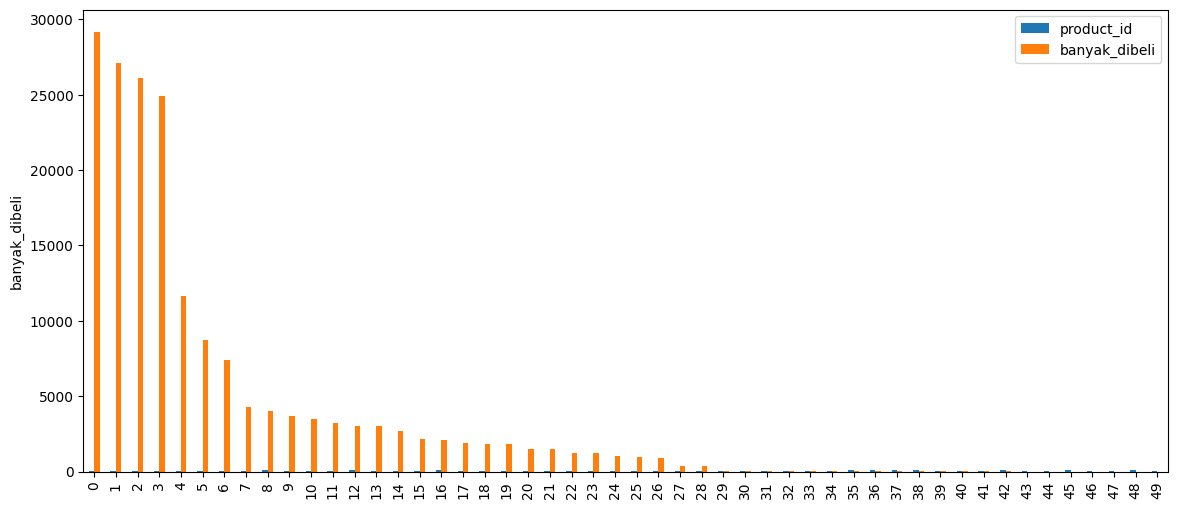

In [ ]:
ax = df2.plot(kind='bar', figsize=(14,6))
ax.set_ylabel('banyak_dibeli')
#ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )

3. Saya ingin melakukan pemerataan marketing di perusahaan kita. Boleh saya minta info Total belanja dan rata-rata belanja dari customer kita per kota?

In [ ]:
total_belanja = (merge_tables.groupby(by=['city'])['total']
                 .sum()
                 .sort_values(ascending=False)
                 .reset_index(name='total_belanja')
                )
avg_belanja = (merge_tables.groupby(by=['city'])['total']
               .mean()
               .reset_index(name='avg_belanja')
               )
info_perkota = total_belanja.merge(avg_belanja,left_on='city',right_on='city')
info_perkota

,city,total_belanja,avg_belanja
0,Depok,5337714240,72853.905495
1,Tangerang,2644908252,72758.259573
2,Jakarta,2635133863,73043.958948
3,Bogor,2593747093,72668.228868


4. berapa banyak customer kita dari masing - masing kota

In [ ]:
df4a = merge_tables
df4_all = (df4a.groupby(by=['city'])['customer_id']
       .count()
       .sort_values(ascending=True)
       .reset_index(name='Jumlah_customer')
       )
df4b = merge_tables[
    (merge_tables['gender'] == 'Female')
]
df4_female = (df4b.groupby(by=['city'])['customer_id']
              .count()
              .sort_values(ascending=True)
              .reset_index(name='Perempuan')
              )
df4c = merge_tables[
    (merge_tables['gender'] == 'Male')
]
df4_male = (df4c.groupby(by=['city'])['customer_id']
            .count()
            .sort_values(ascending=True)
            .reset_index(name='Laki-laki')
            )
dfmerge1 = df4_all.merge(df4_female, left_on='city', right_on='city')
dfmerge2 = dfmerge1.merge(df4_male, left_on='city', right_on='city')
dfmerge2

,city,Jumlah_customer,Perempuan,Laki-laki
0,Bogor,35693,17888,17805
1,Jakarta,36076,17867,18209
2,Tangerang,36352,18038,18314
3,Depok,73266,36550,36716


5. Perbandingan customer laki-laki dengan perempuan

In [ ]:
df6 = (merge_tables.groupby(by=['gender'])['id']
       .count()
       .sort_values(ascending=False)
       .reset_index(name='jumlah')
       )
df6

,gender,jumlah
0,Male,91044
1,Female,90343


Text(0, 0.5, 'Jumlah_customer')

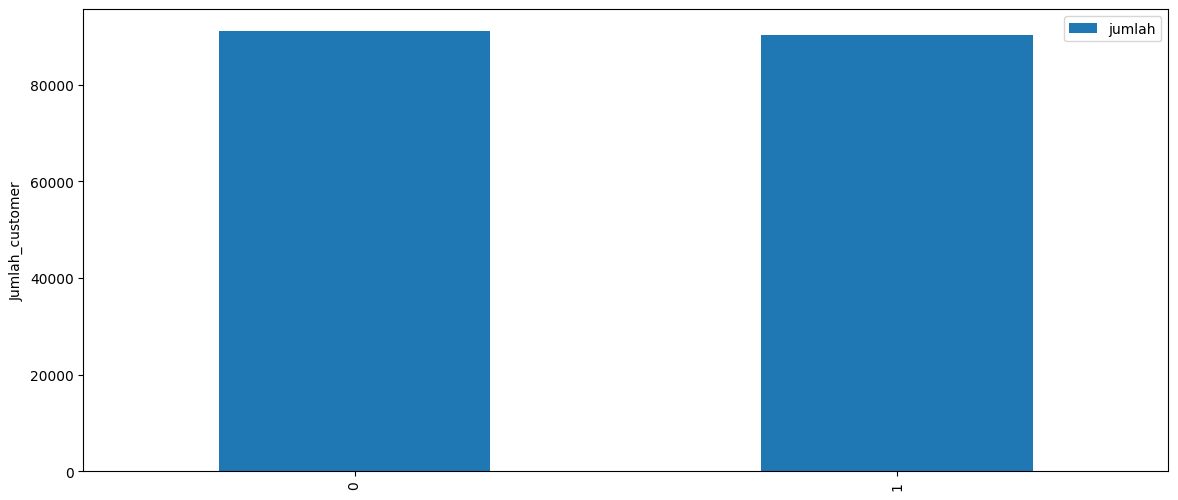

In [ ]:
ax = df6.plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Jumlah_customer')